In [8]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

sigma = 0.1

#### sin(6x)

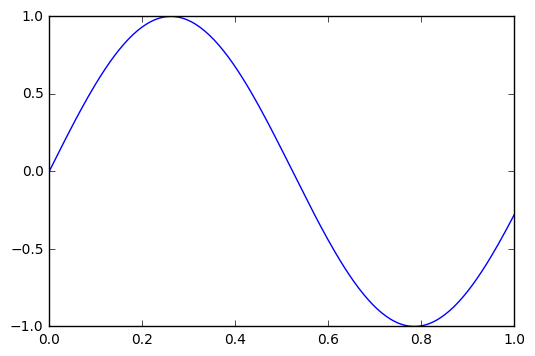

In [2]:
# sin
x_sin = np.linspace(-0, 1, 201)
plt.plot(x_sin, np.sin(x_sin*6))
plt.show()

#### traindata(ノイズ無し)

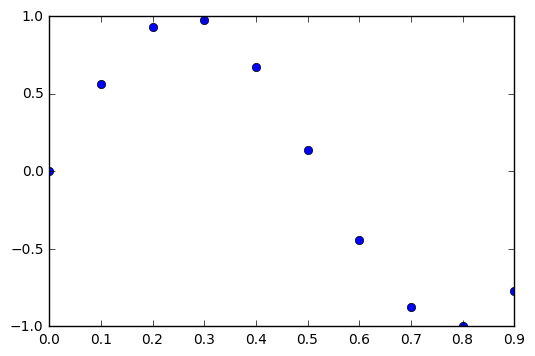

In [3]:
# train data
X_train = np.arange(0., 1., 0.1)
T_train = np.sin(X_train*6)
plt.plot(X_train, T_train, "o")
plt.show()

#### g(x)

***$g(x)=\int_{-\infty}^{\infty}f(x,t)dt$***

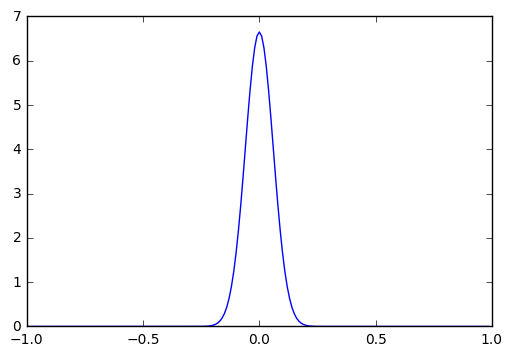

In [4]:
# g(x)
def g(x):
    return (1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-x**2 / (2 * sigma**2)))

x = np.arange(-1., 1., 0.01)
y = g(x)
plt.plot(x, y)

plt.show()

#### kernel(x,xn)

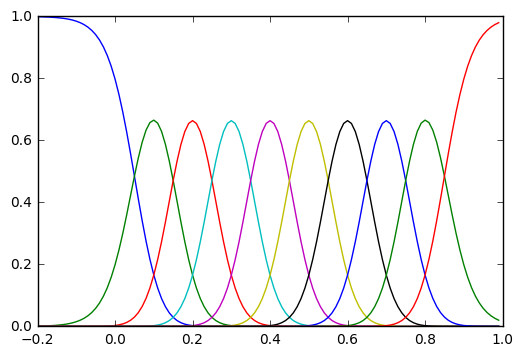

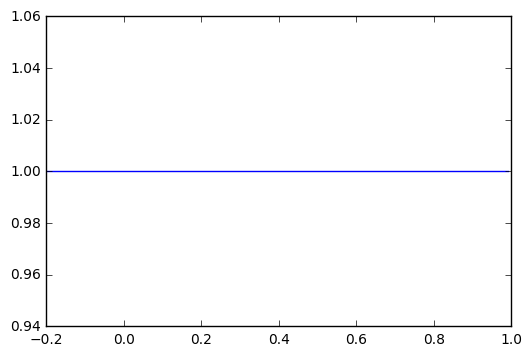

In [5]:
# k(x, x_n)
def kernel(x, xn):
    gx_n = g(x-xn)
    sum_gx = sum([g(x - xm) for xm in X_train])
    return gx_n / sum_gx

x = np.arange(-0.2, 1., 0.01)
y = [kernel(x, xn) for xn in X_train]
for i in range(len(y)):
    plt.plot(x, y[i])
plt.show()

y2 = sum(y)
plt.plot(x,y2)
plt.show()

#### E(x)

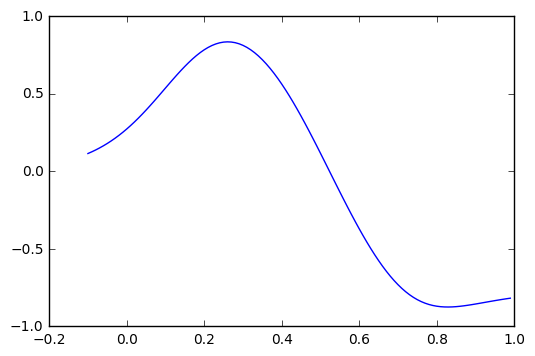

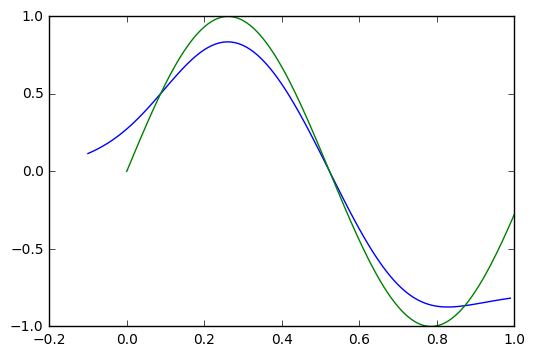

In [13]:
# E[t|x]
def E(x):
    return sum([kernel(x,xn)*tn for xn,tn in zip(X_train,T_train)])
# E(t|x)だけ
x = np.arange(-0.1, 1., 0.01)
t = E(x)
plt.plot(x, t)
plt.show()

# E(t|x)とsin(x)
x = np.arange(-0.1, 1., 0.01)
t = E(x)
plt.plot(x, t)

x_sin = np.linspace(-0, 1, 201)
plt.plot(x_sin, np.sin(x_sin*6))

plt.show()

#### p(x,t)

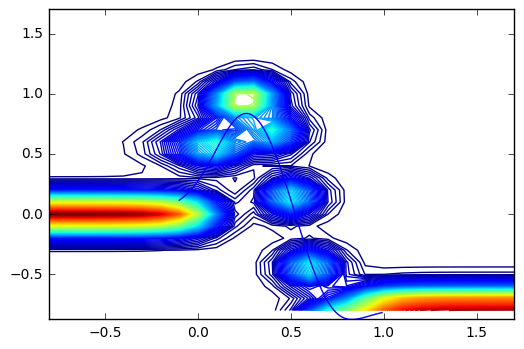

In [15]:
delta = 0.1
minXY=-0.8
maxXY=1.8
nContour=100


def p(x, t):
    right = sum([np.exp(-(t-tn)**2/(2*sigma**2))*kernel(x, xn) for xn,tn in zip(X_train,T_train)])
    left = np.sqrt(2*np.pi*sigma**2)
    return left * right

def CreateMeshData():
    x = np.arange(minXY, maxXY, delta)
    y = np.arange(minXY, maxXY, delta)
    X, Y = np.meshgrid(x, y)
    Z=[p(x,y) for (x,y) in zip(X,Y)]
    return(X,Y,Z)

x_E = np.arange(-0.1, 1., 0.01)
t_E = E(x_E)
plt.plot(x_E, t_E)

(X,Y,Z)=CreateMeshData()
CS = plt.contour(X, Y, Z,nContour)
plt.show()

#### Var(t|x)

In [ ]:
http://myenigma.hatenablog.com/entry/2015/08/30/223559
http://qiita.com/data9824/items/3416cfacf4dc9c347758